In [1]:
options(warn = -1)
options(repr.plot.width=15, repr.plot.height=9) 
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8")

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

In [2]:
# 주간식 문제를 풀기위해 사용



In [3]:
# 단순회귀 분석
regression <- read.csv("./Data/regression.csv")
head(regression)
tail(regression)
summary(regression)
str(regression)


,age,Height,Weight
,<chr>,<dbl>,<dbl>
1,0~3Months,59.1,5.9
2,3~6Months,66.7,8.0
3,6~9Months,71.4,8.9
4,9~12Months,75.0,10.1
5,12~18Months,80.1,10.9
6,2Year,87.8,13.2


,age,Height,Weight
,<chr>,<dbl>,<dbl>
26,30~34Year,171.3,71.5
27,35~39Year,170.7,72.3
28,40~49Year,168.6,70.6
29,50~59Year,166.1,69.1
30,60~69Year,164.4,65.9
31,70YearOver,162.4,61.1


     age                Height          Weight     
 Length:31          Min.   : 59.1   Min.   : 5.90  
 Class :character   1st Qu.:105.7   1st Qu.:17.90  
 Mode  :character   Median :150.7   Median :45.20  
                    Mean   :135.8   Mean   :42.62  
                    3rd Qu.:169.8   3rd Qu.:66.65  
                    Max.   :173.8   Max.   :72.30  

'data.frame':	31 obs. of  3 variables:
 $ age   : chr  "0~3Months" "3~6Months" "6~9Months" "9~12Months" ...
 $ Height: num  59.1 66.7 71.4 75 80.1 ...
 $ Weight: num  5.9 8 8.9 10.1 10.9 13.2 14.8 16.7 19.1 21.5 ...


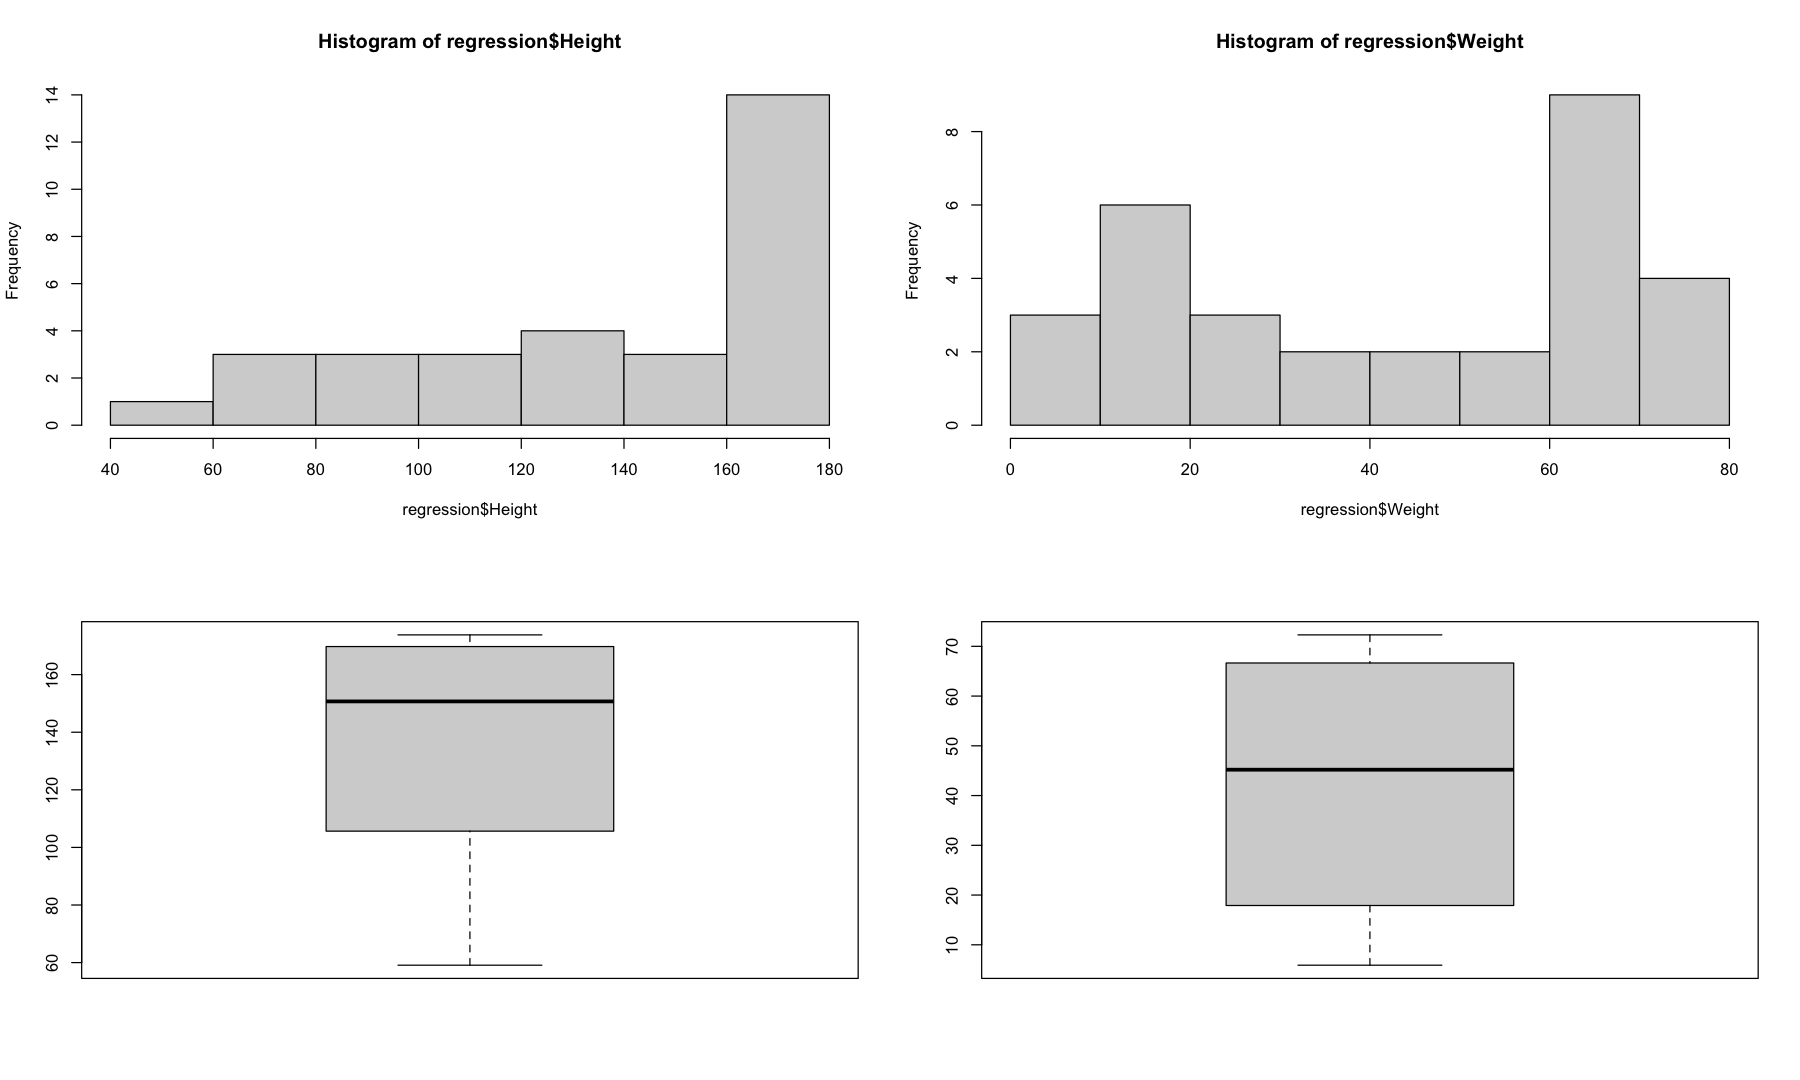

In [4]:
par(mfrow = c(2,2))
par(bg = 'white')
hist(regression$Height)
hist(regression$Weight)
boxplot(regression$Height)
boxplot(regression$Weight)

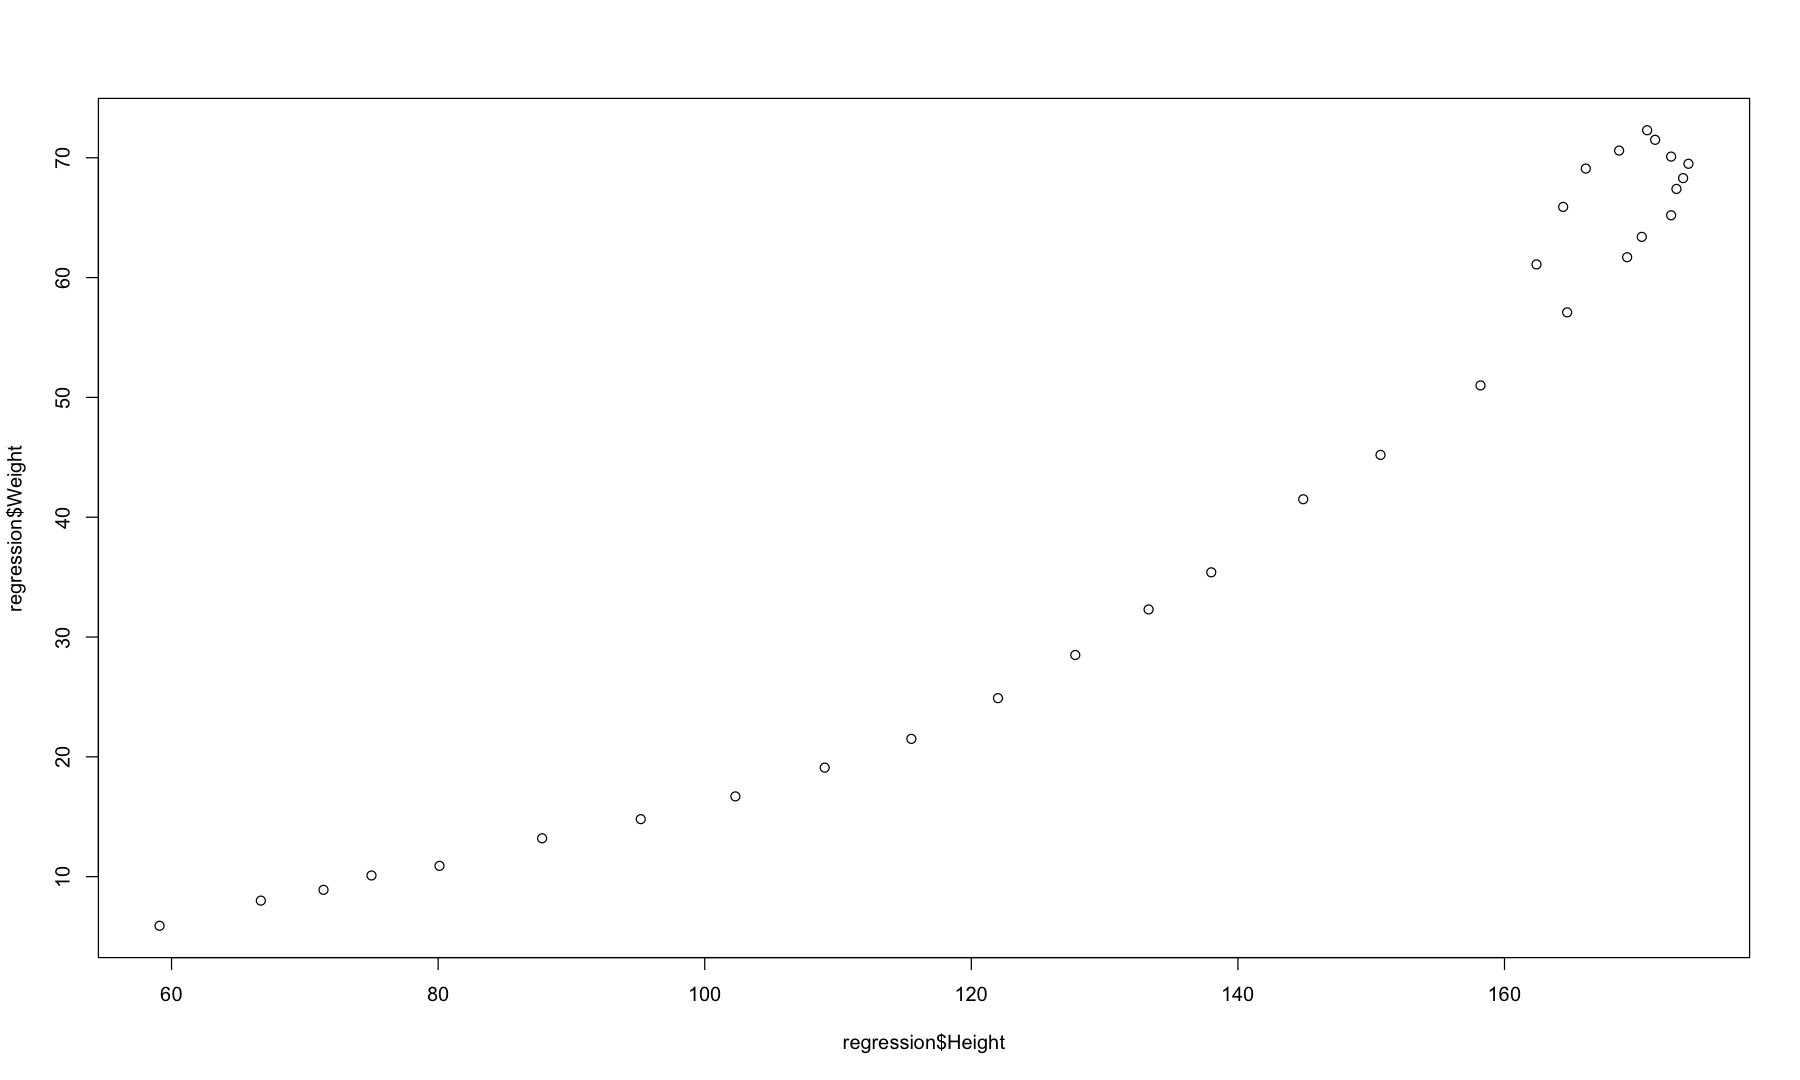

In [5]:
par(bg = 'white')
plot(regression$Height,regression$Weight)

In [6]:
# 상관 계수
cor(regression$Height, regression$Weight)

[1] 0.9672103

[1] "lm"

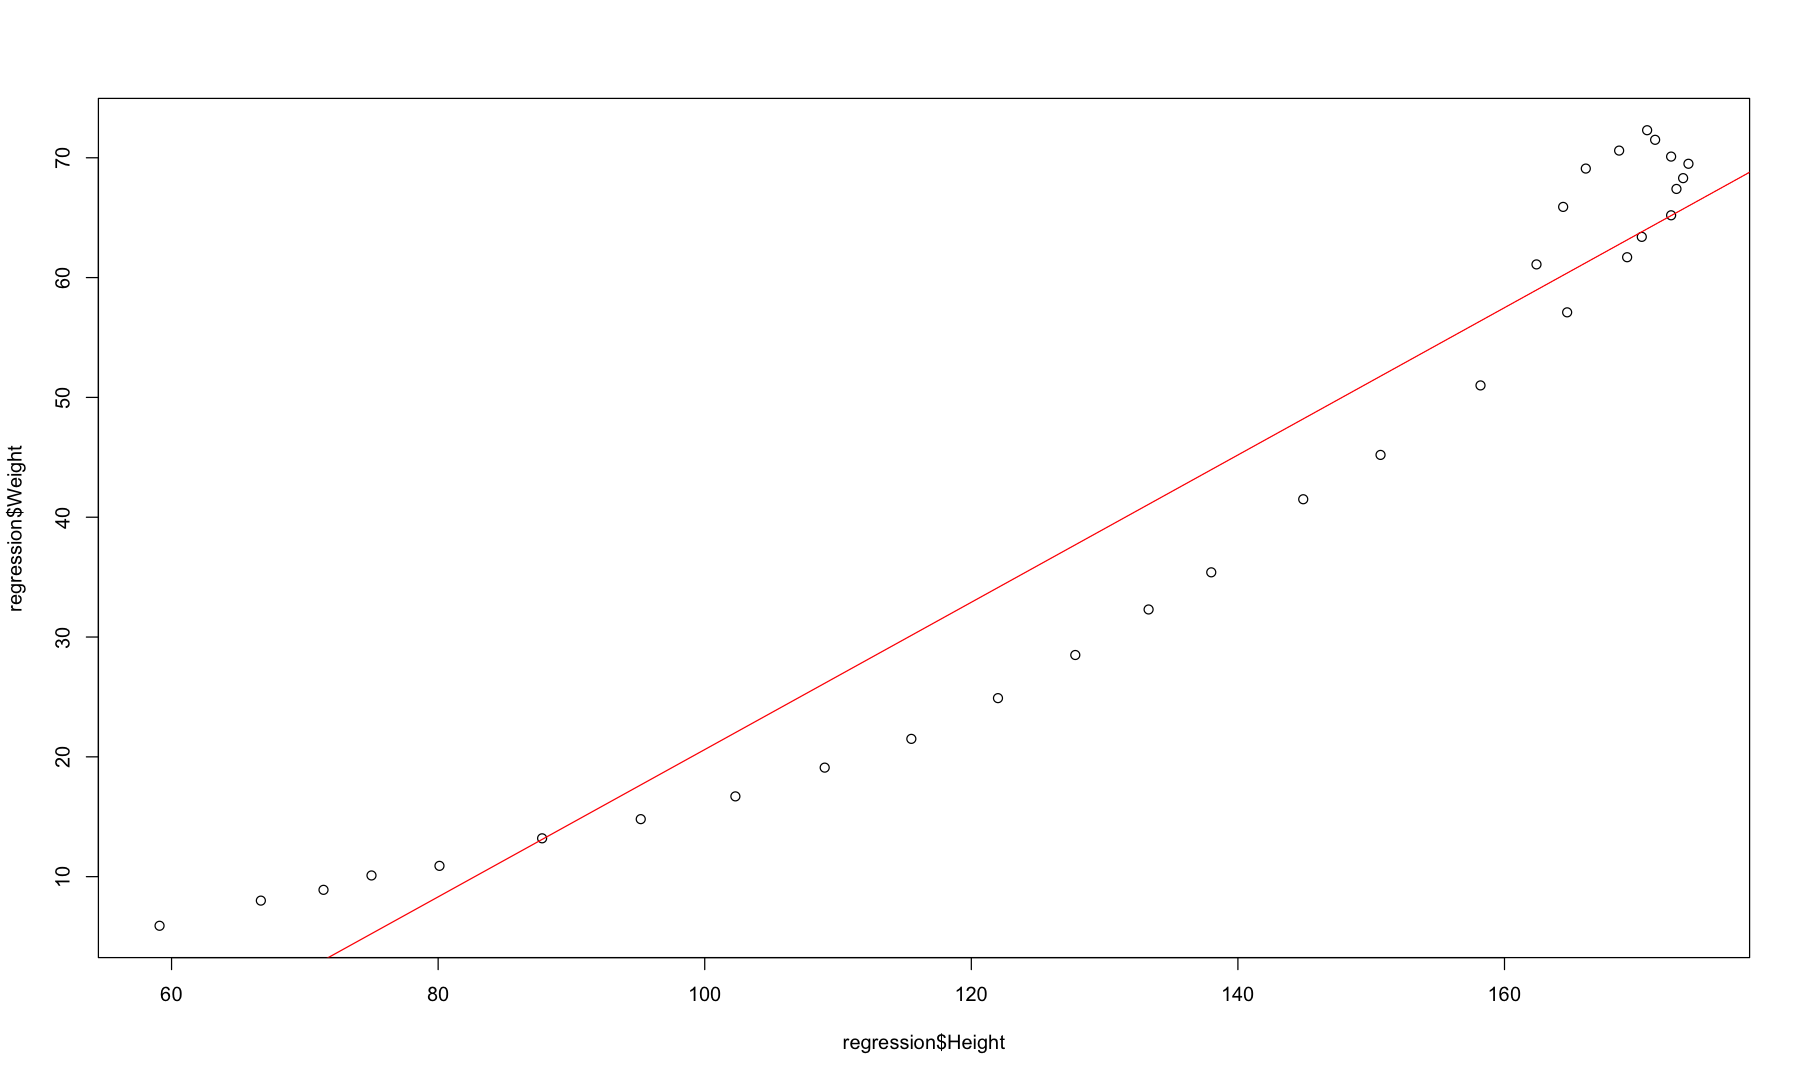

In [7]:
# 회귀선(중심선, 평균선)
par(bg = 'white')
plot(regression$Weight ~ regression$Height)

# 회귀식
# 추세를 알아보는 데이터
r <- lm(regression$Weight ~ regression$Height)
abline(r, col='red')
class(r)

In [8]:
# 분석 결과 
summary(r)

# Residuals 잔차  : 예측값과 실제 값의 차이
# Coefficients 계수  y = ax +b 의 a,b값 
# 여기선 -40.86594 이게 b 값  0.61474   이게 a값이다
# Adjusted R-squared:  0.9333 <- 예측력
# Residual standard error: 6.355 <- 표준오차   -6.355 ~ +6.355 
# Multiple R-squared:  0.9355 <- 1에 가까울수록 데이터가 정확하다



Call:
lm(formula = regression$Weight ~ regression$Height)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.2327 -5.9811  0.0915  5.3125 10.4346 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -40.86594    4.22768  -9.666 1.42e-10 ***
regression$Height   0.61474    0.02998  20.508  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.355 on 29 degrees of freedom
Multiple R-squared:  0.9355,	Adjusted R-squared:  0.9333 
F-statistic: 420.6 on 1 and 29 DF,  p-value: < 2.2e-16


p-value: < 2.2e-16 < 0.05    
Adjusted R-squared:  0.9333  -> 예측력
Residual standard error: 6.355 -> 표준오차


Call:
lm(formula = regression$Weight ~ regression$Height)

Coefficients:
      (Intercept)  regression$Height  
         -40.8659             0.6147  


y = ax + b
뭄무게 = 0.6147 * 키 + -40.8659

In [10]:
# 키가 170인 사람의 몸무게
0.6147 * 170 + - 40.8659

# 표준오차를 적용한 키가 170인 사람의 몸무게
cat(0.6147 * 170 + - 40.8659 -6.355,"~", 0.6147 * 170 + - 40.8659 + 6.355)

[1] 63.6331

57.2781 ~ 69.9881

# IQ

In [11]:
iq <- read.csv("./Data/IQ.csv")
iq

이름,성적,IQ,다니는.학원수,게임하는.시간,TV시청.시간
<chr>,<int>,<int>,<int>,<int>,<int>
A,90,140,2,1,0
B,75,125,1,3,3
C,77,120,1,0,4
D,83,135,2,3,2
E,65,105,0,4,4
F,80,123,3,1,1
G,83,132,3,4,1
H,70,115,1,1,3
I,87,128,4,0,0


### (1) 성적과 가장 관련이 깊은 항목은?

In [12]:
iq$`성적`

[1] 90 75 77 83 65 80 83 70 87 79

In [13]:
cor(iq[,-1])


,성적,IQ,다니는.학원수,게임하는.시간,TV시청.시간
성적,1.0000000,0.9102242,0.7840514,-0.3383549,-0.8473333
IQ,0.9102242,1.0000000,0.6009466,-0.1038108,-0.6783251
다니는.학원수,0.7840514,0.6009466,1.0000000,-0.3106005,-0.8465387
게임하는.시간,-0.3383549,-0.1038108,-0.3106005,1.0000000,0.2440191
TV시청.시간,-0.8473333,-0.6783251,-0.8465387,0.2440191,1.0000000


> 성적과 가장 관계가 깊은항목은 IQ다

### (2)IQ 가 126 인 사람의 성적을 예측해 보자

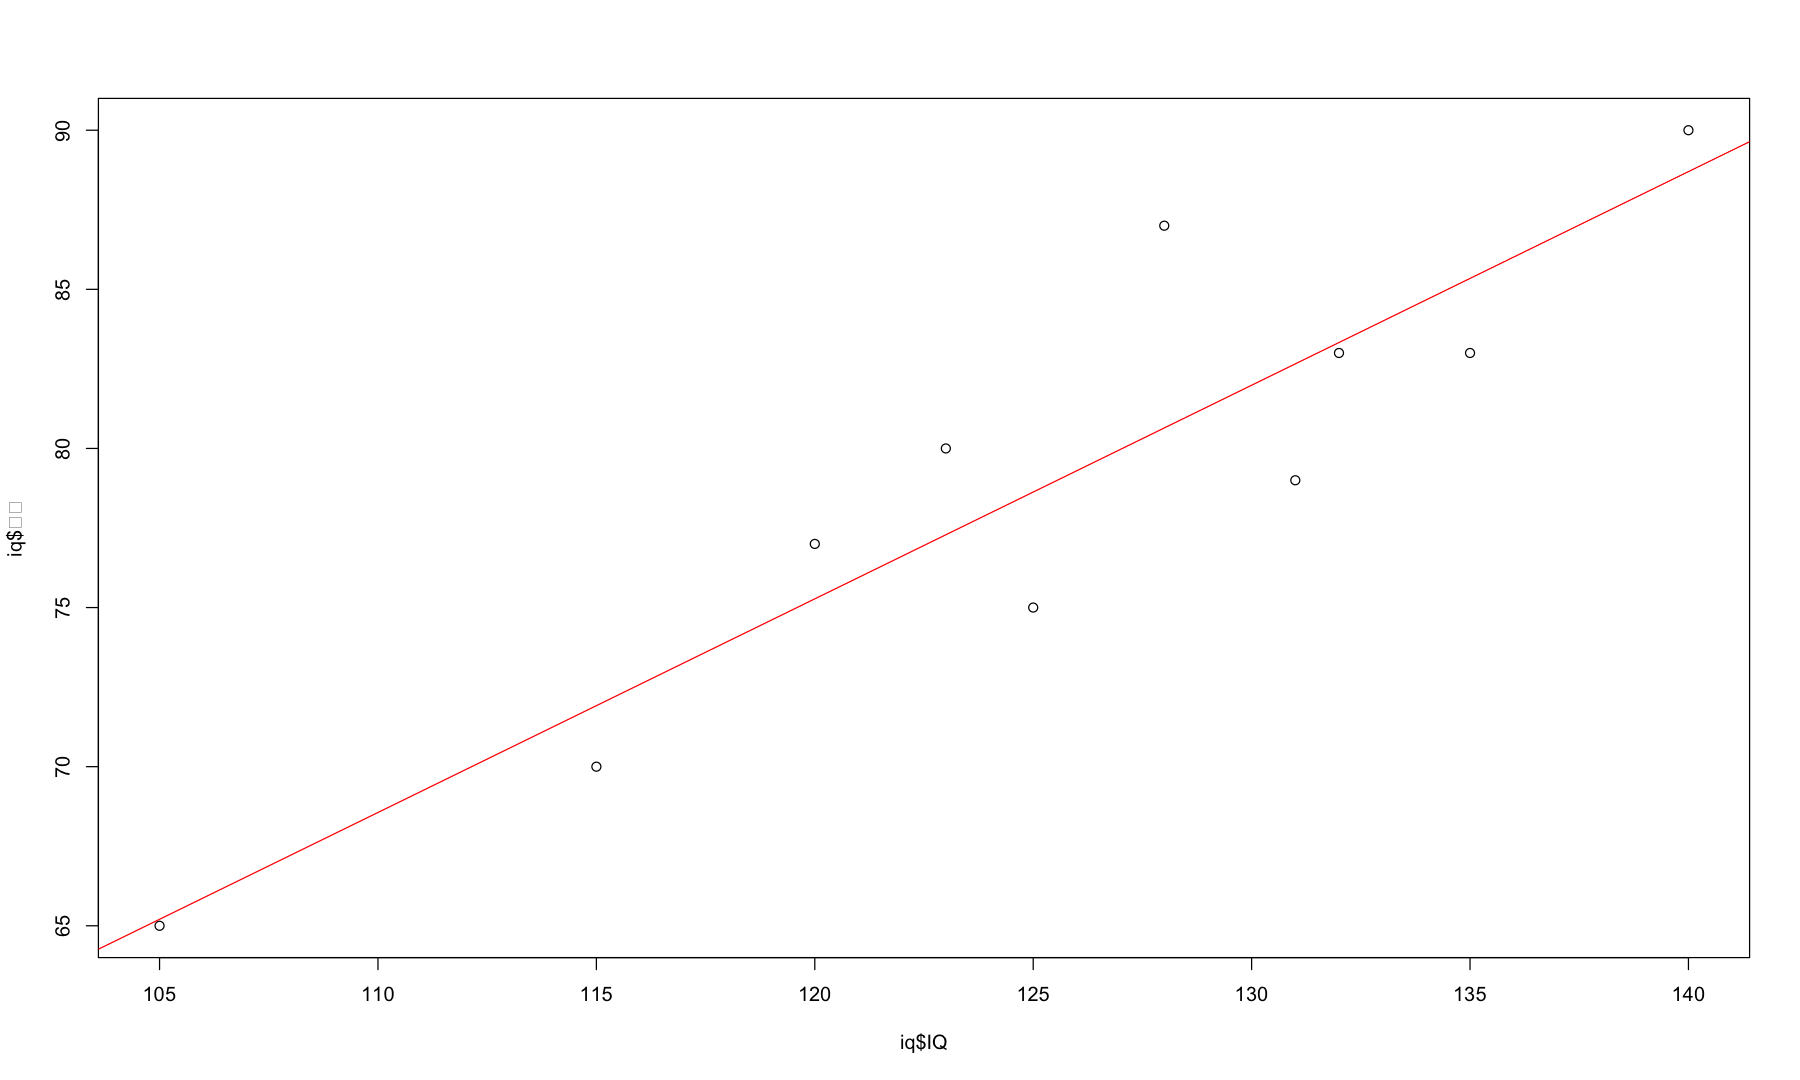

In [14]:
par(bg = 'white')
plot(iq$`성적` ~ iq$IQ)

pre <- lm(iq$`성적` ~ iq$IQ)
abline(pre, col='red')


In [15]:
summary(pre)


Call:
lm(formula = iq$성적 ~ iq$IQ)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6598 -2.2384 -0.2674  1.6186  6.3544 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -5.2918    13.5832  -0.390 0.707007    
iq$IQ         0.6714     0.1080   6.217 0.000255 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.322 on 8 degrees of freedom
Multiple R-squared:  0.8285,	Adjusted R-squared:  0.8071 
F-statistic: 38.65 on 1 and 8 DF,  p-value: 0.0002547


Residual standard error: 3.322
 p-value: 0.0002547
 Adjusted R-squared:  0.8071 

In [16]:
# 성적 = 0.6714 * IQ + -5.2918
0.6714 * 126 + -5.2918

# 오차를 포함하기
cat(0.6714 * 126 + -5.2918 -3.322 ,"~", 0.6714 * 126 + -5.2918  + 3.322)

[1] 79.3046

75.9826 ~ 82.6266

### (3) 학원을 몇군데 다녀야 성적이 90점 이상이 될까?

,이름,성적,IQ,다니는.학원수,게임하는.시간,TV시청.시간
,<chr>,<int>,<int>,<int>,<int>,<int>
1,A,90,140,2,1,0
2,B,75,125,1,3,3
3,C,77,120,1,0,4
4,D,83,135,2,3,2
5,E,65,105,0,4,4
6,F,80,123,3,1,1


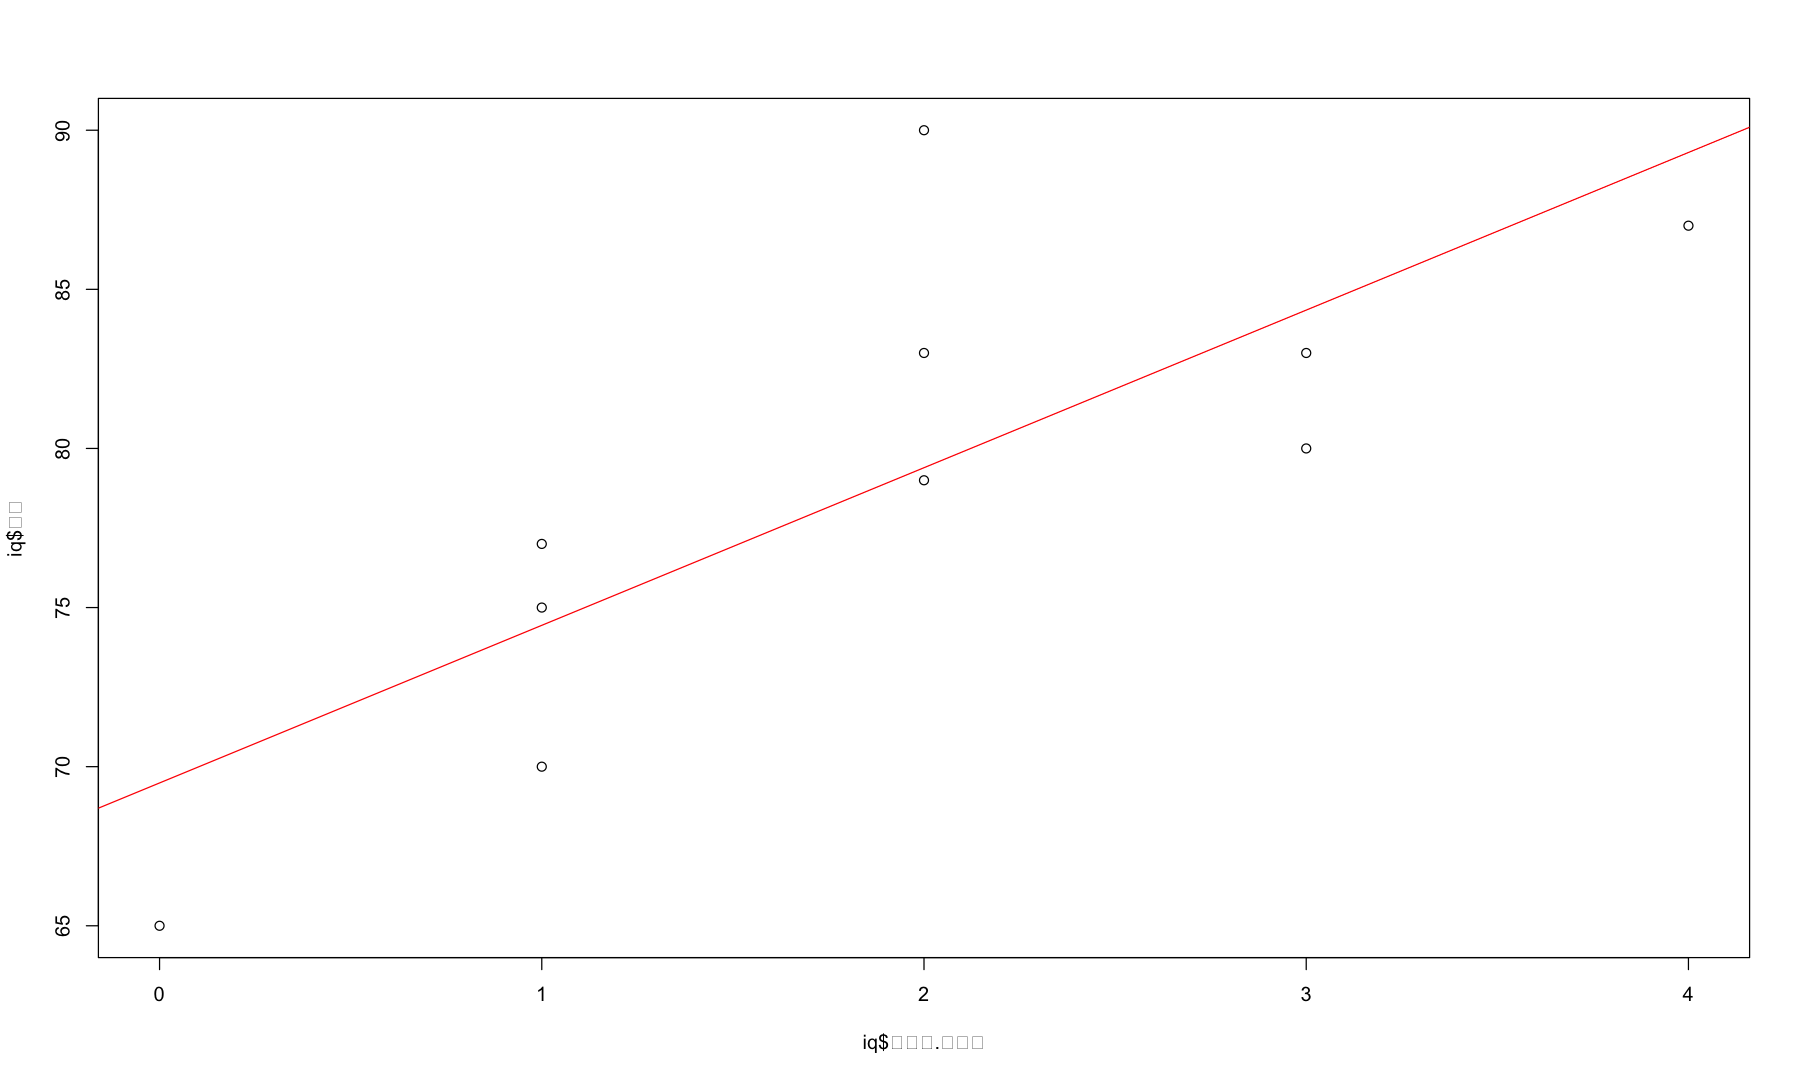

In [17]:
head(iq)
par(bg = 'white')
plot(iq$`성적` ~ iq$`다니는.학원수`)

Q <- lm(iq$`성적` ~ iq$`다니는.학원수`)
abline(Q, col='red')

#boxplot(iq$`다니는.학원수`)


In [18]:
summary(Q)


Call:
lm(formula = iq$성적 ~ iq$다니는.학원수)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4884 -3.8372 -0.8721  2.0581 10.6047 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        69.488      3.069  22.642 1.53e-08 ***
iq$다니는.학원수    4.953      1.386   3.573  0.00726 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.98 on 8 degrees of freedom
Multiple R-squared:  0.6147,	Adjusted R-squared:  0.5666 
F-statistic: 12.77 on 1 and 8 DF,  p-value: 0.007264


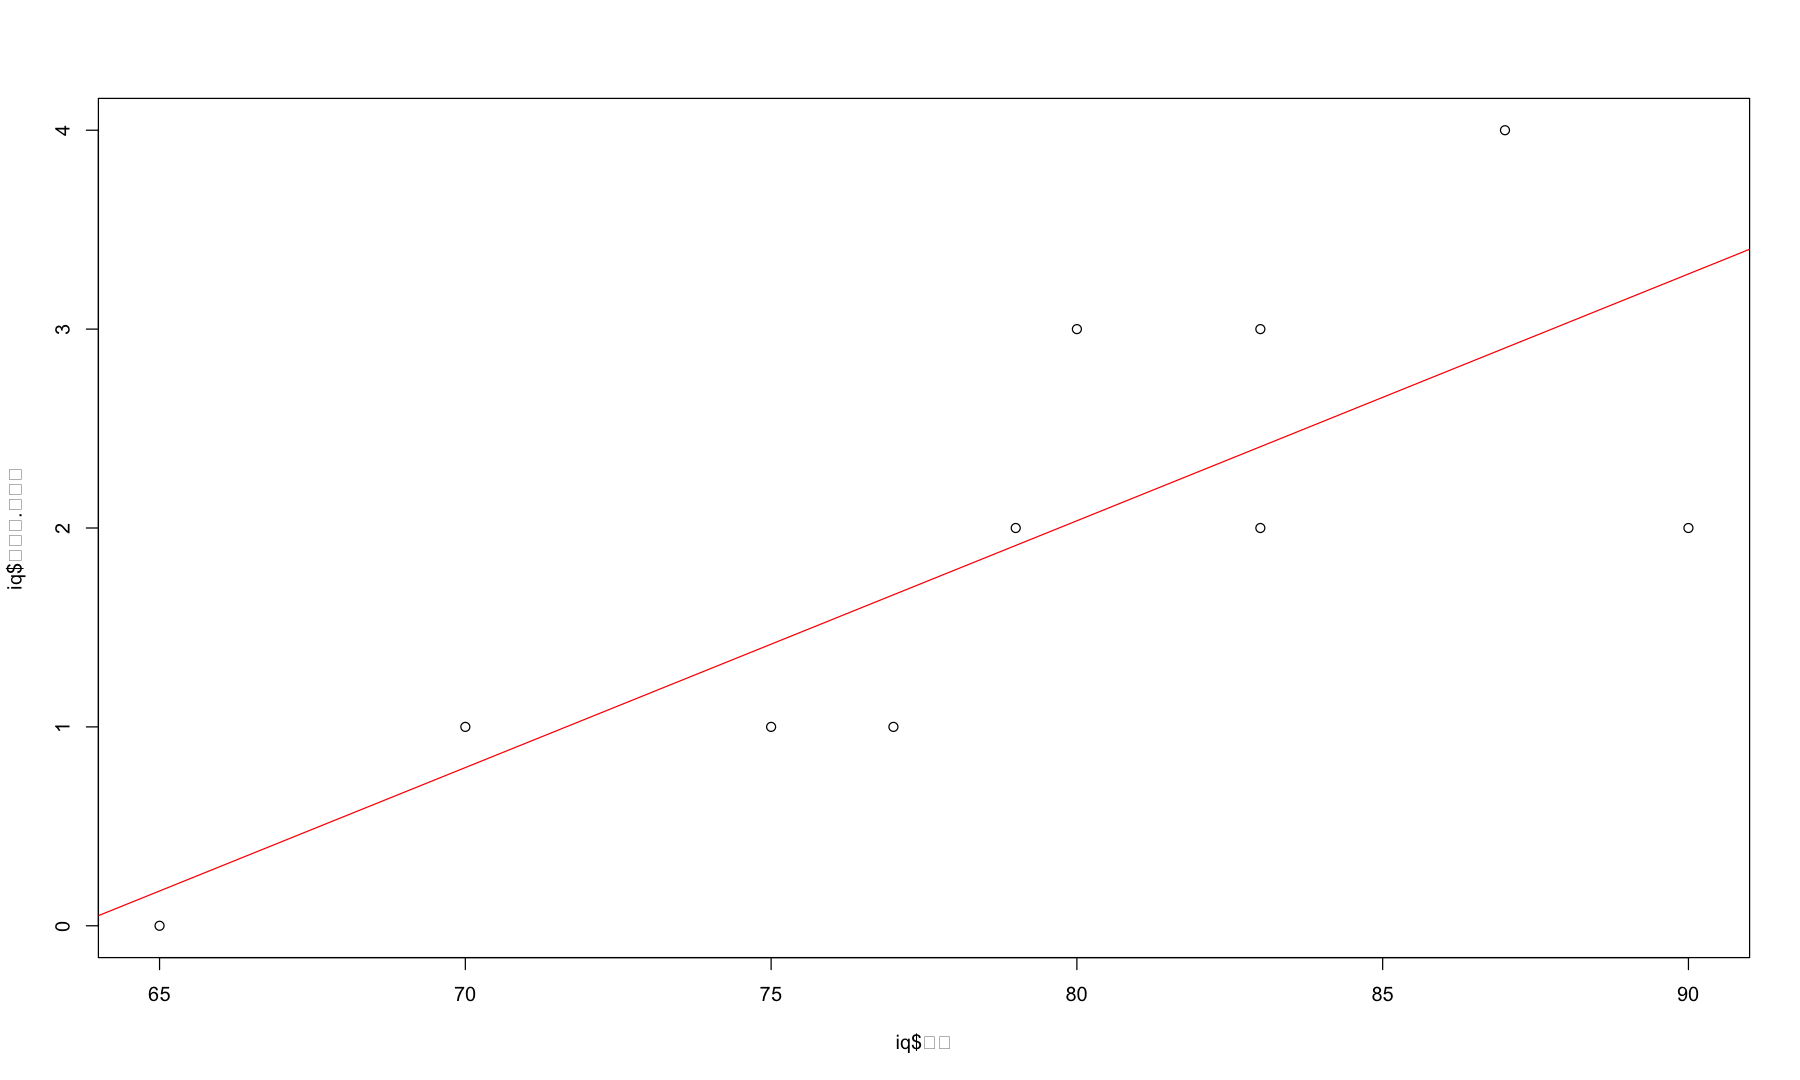

In [19]:
par(bg = 'white')
plot(iq$`다니는.학원수` ~ iq$`성적`)

A <- lm(iq$`다니는.학원수` ~ iq$`성적`)
abline(A, col='red')

In [20]:
summary(A)


Call:
lm(formula = iq$다니는.학원수 ~ iq$성적)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2775 -0.4142 -0.0437  0.4945  1.0948 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -7.89163    2.75190  -2.868  0.02090 * 
iq$성적      0.12410    0.03473   3.573  0.00726 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7882 on 8 degrees of freedom
Multiple R-squared:  0.6147,	Adjusted R-squared:  0.5666 
F-statistic: 12.77 on 1 and 8 DF,  p-value: 0.007264


In [21]:
# 방법 1
# 성적이 변수인 식
0.12410 * 90 + -7.89163 

cat(0.12410 * 90 + -7.89163 - 0.7882 , "~" ,0.12410 * 90 + -7.89163 + 0.7882 )

[1] 3.27737

2.48917 ~ 4.06557

In [41]:
# 학원 숫자 가 변수일때 식
90 >= 4.953   * seq(1,10,1) + 69.488

for(i in 1:6) {
cat(4.953   * i + 69.488  - 4.98, "<",i , "<",4.953   * i + 69.488  + 4.98, "\n") 
}

# 소숫점 까지 구해보자
90 >= 4.953   * seq(1,5,0.1) + 69.488
# 방법 3
cat("0.1씩 증가하는 값이 32번 true 로 그 다음 false 로 바뀌었기 때문에 3.2 가 원하는 결과값이다")
table(90 >= 4.953   * seq(1,5,0.1) + 69.488)
# 방법 4
for(i in seq(1,6,0.1)) {
    cat(4.953   * i + 69.488  - 4.98, "<", i , "<",4.953   * i + 69.488  + 4.98, "\n") 
}


[1]  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE

69.461 < 1 < 79.421 
74.414 < 2 < 84.374 
79.367 < 3 < 89.327 
84.32 < 4 < 94.28 
89.273 < 5 < 99.233 
94.226 < 6 < 104.186 


[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[25]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE
[37] FALSE FALSE FALSE FALSE FALSE

0.1씩 증가하는 값이 32번 true 로 그 다음 false 로 바뀌었기 때문에 3.2 가 원하는 결과값이다


FALSE  TRUE 
    9    32 

69.461 < 1 < 79.421 
69.9563 < 1.1 < 79.9163 
70.4516 < 1.2 < 80.4116 
70.9469 < 1.3 < 80.9069 
71.4422 < 1.4 < 81.4022 
71.9375 < 1.5 < 81.8975 
72.4328 < 1.6 < 82.3928 
72.9281 < 1.7 < 82.8881 
73.4234 < 1.8 < 83.3834 
73.9187 < 1.9 < 83.8787 
74.414 < 2 < 84.374 
74.9093 < 2.1 < 84.8693 
75.4046 < 2.2 < 85.3646 
75.8999 < 2.3 < 85.8599 
76.3952 < 2.4 < 86.3552 
76.8905 < 2.5 < 86.8505 
77.3858 < 2.6 < 87.3458 
77.8811 < 2.7 < 87.8411 
78.3764 < 2.8 < 88.3364 
78.8717 < 2.9 < 88.8317 
79.367 < 3 < 89.327 
79.8623 < 3.1 < 89.8223 
80.3576 < 3.2 < 90.3176 
80.8529 < 3.3 < 90.8129 
81.3482 < 3.4 < 91.3082 
81.8435 < 3.5 < 91.8035 
82.3388 < 3.6 < 92.2988 
82.8341 < 3.7 < 92.7941 
83.3294 < 3.8 < 93.2894 
83.8247 < 3.9 < 93.7847 
84.32 < 4 < 94.28 
84.8153 < 4.1 < 94.7753 
85.3106 < 4.2 < 95.2706 
85.8059 < 4.3 < 95.7659 
86.3012 < 4.4 < 96.2612 
86.7965 < 4.5 < 96.7565 
87.2918 < 4.6 < 97.2518 
87.7871 < 4.7 < 97.7471 
88.2824 < 4.8 < 98.2424 
88.7777 < 4.9 < 98.7377 
89.273 < 5 < 99.23

### (4) 성적이 85점이라면 IQ는 얼마이상?

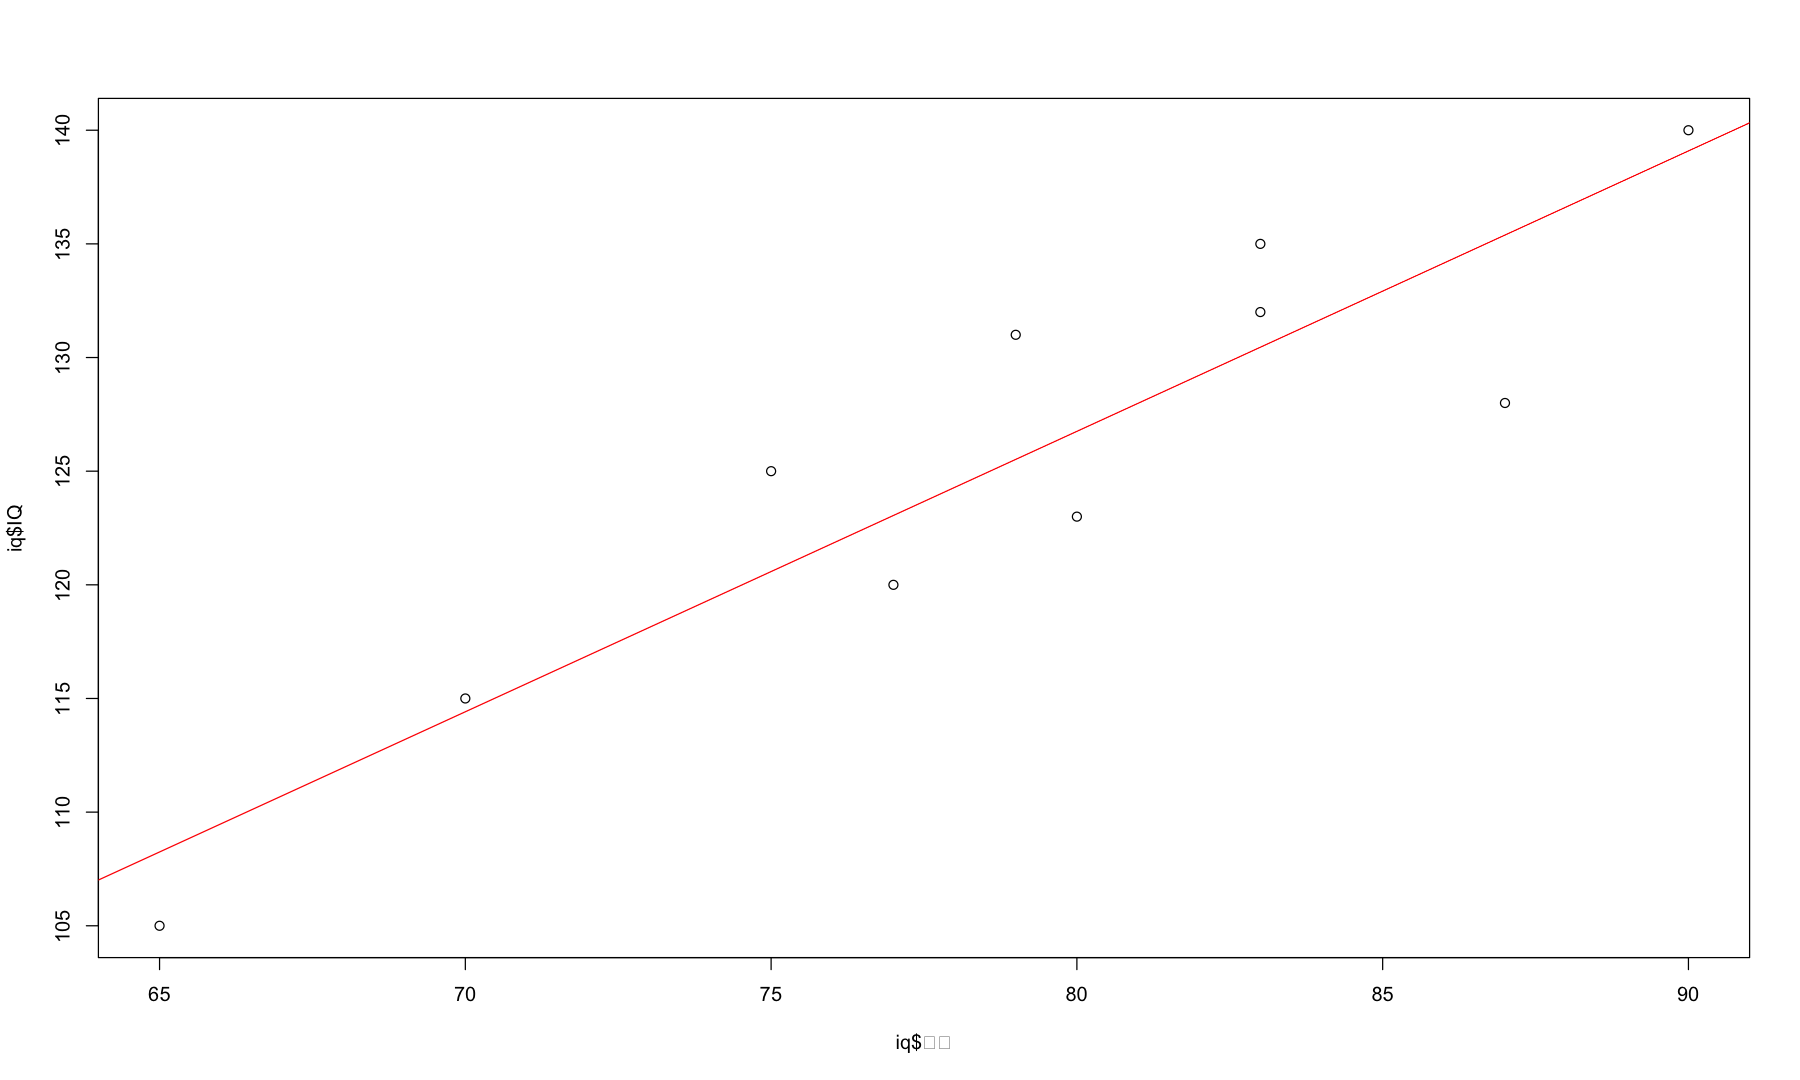

In [23]:
par(bg = 'white')
plot(iq$IQ ~ iq$`성적`)

D <- lm(iq$IQ ~ iq$`성적`)
abline(D, col='red')

In [24]:
summary(D)


Call:
lm(formula = iq$IQ ~ iq$성적)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3956 -3.1991  0.7426  3.6946  5.4766 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  28.0353    15.7260   1.783 0.112480    
iq$성적       1.2340     0.1985   6.217 0.000255 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.504 on 8 degrees of freedom
Multiple R-squared:  0.8285,	Adjusted R-squared:  0.8071 
F-statistic: 38.65 on 1 and 8 DF,  p-value: 0.0002547


In [25]:
# 성적이 85라면 예상되는 IQ 
anwser <- 1.2340 * 85 + 28.0353 
cat(anwser,"\n")

cat(round(anwser - 4.504) , "~" , round(anwser +4.504))

132.9253 
128 ~ 137

In [ ]:
 # nolint: trailing_blank_lines_linter.


### 다중회귀분석
여러개의 항목들로 구성된 식으로 예측하는 방법


In [28]:
data(attitude)

In [29]:
help(attitude)

attitude               package:datasets                R Documentation

_T_h_e _C_h_a_t_t_e_r_j_e_e-_P_r_i_c_e _A_t_t_i_t_u_d_e _D_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     From a survey of the clerical employees of a large financial
     organization, the data are aggregated from the questionnaires of
     the approximately 35 employees for each of 30 (randomly selected)
     departments.  The numbers give the percent proportion of
     favourable responses to seven questions in each department.

_U_s_a_g_e:

     attitude
     
_F_o_r_m_a_t:

     A data frame with 30 observations on 7 variables. The first column
     are the short names from the reference, the second one the
     variable names in the data frame:

          Y  rating      numeric  Overall rating                    
       X[1]  complaints  numeric  Handling of employee complaints   
       X[2]  privileges  numeric  Does not allow special privileges 
       X[3]  learni

In [30]:
# 어떤 항목이 진급에 제일 큰 영향이 갈까 에 대한 설문조사
head(attitude)

,rating,complaints,privileges,learning,raises,critical,advance
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,43,51,30,39,61,92,45
2,63,64,51,54,63,73,47
3,71,70,68,69,76,86,48
4,61,63,45,47,54,84,35
5,81,78,56,66,71,83,47
6,43,55,49,44,54,49,34


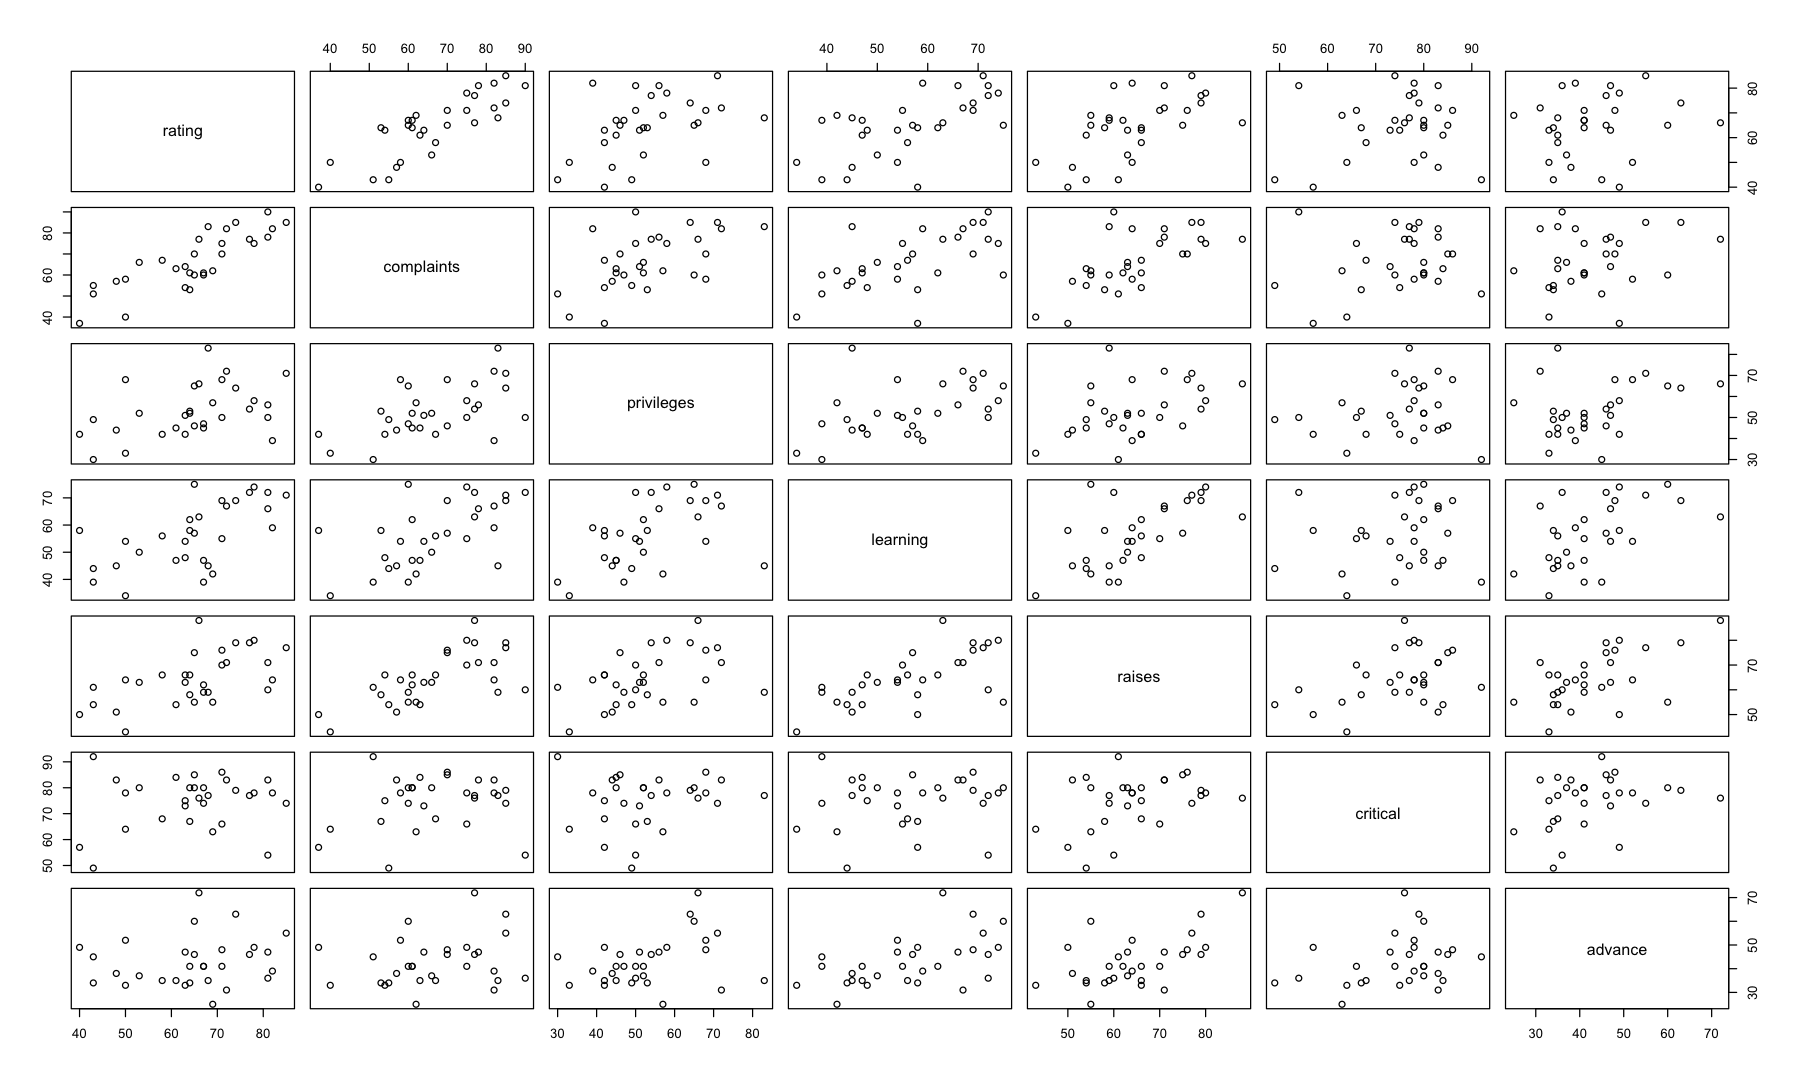

In [31]:
par(bg = 'white')
plot(attitude)

In [32]:
# rating을 제외한 변수들이 rating에 어떤 영향ㅇ을 미치는지 회귀분석
model <- lm(rating ~ ., data=attitude)
model


Call:
lm(formula = rating ~ ., data = attitude)

Coefficients:
(Intercept)   complaints   privileges     learning       raises     critical  
   10.78708      0.61319     -0.07305      0.32033      0.08173      0.03838  
    advance  
   -0.21706  


Rating =  0.61319 * complaints + -0.07305 * privileges +.....  + 10.78708 

In [33]:
summary(model)


Call:
lm(formula = rating ~ ., data = attitude)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.9418  -4.3555   0.3158   5.5425  11.5990 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.78708   11.58926   0.931 0.361634    
complaints   0.61319    0.16098   3.809 0.000903 ***
privileges  -0.07305    0.13572  -0.538 0.595594    
learning     0.32033    0.16852   1.901 0.069925 .  
raises       0.08173    0.22148   0.369 0.715480    
critical     0.03838    0.14700   0.261 0.796334    
advance     -0.21706    0.17821  -1.218 0.235577    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.068 on 23 degrees of freedom
Multiple R-squared:  0.7326,	Adjusted R-squared:  0.6628 
F-statistic:  10.5 on 6 and 23 DF,  p-value: 1.24e-05


In [ ]:
#Adjusted R-squared:  0.6628

In [34]:
# 상관계수
cor(attitude)

,rating,complaints,privileges,learning,raises,critical,advance
rating,1.0000000,0.8254176,0.4261169,0.6236782,0.5901390,0.1564392,0.1550863
complaints,0.8254176,1.0000000,0.5582882,0.5967358,0.6691975,0.1877143,0.2245796
privileges,0.4261169,0.5582882,1.0000000,0.4933310,0.4454779,0.1472331,0.3432934
learning,0.6236782,0.5967358,0.4933310,1.0000000,0.6403144,0.1159652,0.5316198
raises,0.5901390,0.6691975,0.4454779,0.6403144,1.0000000,0.3768830,0.5741862
critical,0.1564392,0.1877143,0.1472331,0.1159652,0.3768830,1.0000000,0.2833432
advance,0.1550863,0.2245796,0.3432934,0.5316198,0.5741862,0.2833432,1.0000000


In [36]:
# 예측력을 높이기 위해 상대적으로 기여도가 낮은 변수를 제거
reduced <- step(model, direction = "backward")  # nolint


Start:  AIC=123.36
rating ~ complaints + privileges + learning + raises + critical + 
    advance

             Df Sum of Sq    RSS    AIC
- critical    1      3.41 1152.4 121.45
- raises      1      6.80 1155.8 121.54
- privileges  1     14.47 1163.5 121.74
- advance     1     74.11 1223.1 123.24
<none>                    1149.0 123.36
- learning    1    180.50 1329.5 125.74
- complaints  1    724.80 1873.8 136.04

Step:  AIC=121.45
rating ~ complaints + privileges + learning + raises + advance

             Df Sum of Sq    RSS    AIC
- raises      1     10.61 1163.0 119.73
- privileges  1     14.16 1166.6 119.82
- advance     1     71.27 1223.7 121.25
<none>                    1152.4 121.45
- learning    1    177.74 1330.1 123.75
- complaints  1    724.70 1877.1 134.09

Step:  AIC=119.73
rating ~ complaints + privileges + learning + advance

             Df Sum of Sq    RSS    AIC
- privileges  1     16.10 1179.1 118.14
- advance     1     61.60 1224.6 119.28
<none>                  

In [38]:
summary(reduced)


Call:
lm(formula = rating ~ complaints + learning, data = attitude)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.5568  -5.7331   0.6701   6.5341  10.3610 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.8709     7.0612   1.398    0.174    
complaints    0.6435     0.1185   5.432 9.57e-06 ***
learning      0.2112     0.1344   1.571    0.128    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.817 on 27 degrees of freedom
Multiple R-squared:  0.708,	Adjusted R-squared:  0.6864 
F-statistic: 32.74 on 2 and 27 DF,  p-value: 6.058e-08


In [39]:
reduced


Call:
lm(formula = rating ~ complaints + learning, data = attitude)

Coefficients:
(Intercept)   complaints     learning  
     9.8709       0.6435       0.2112  


### iris에 대한 다중회귀 분석

In [42]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


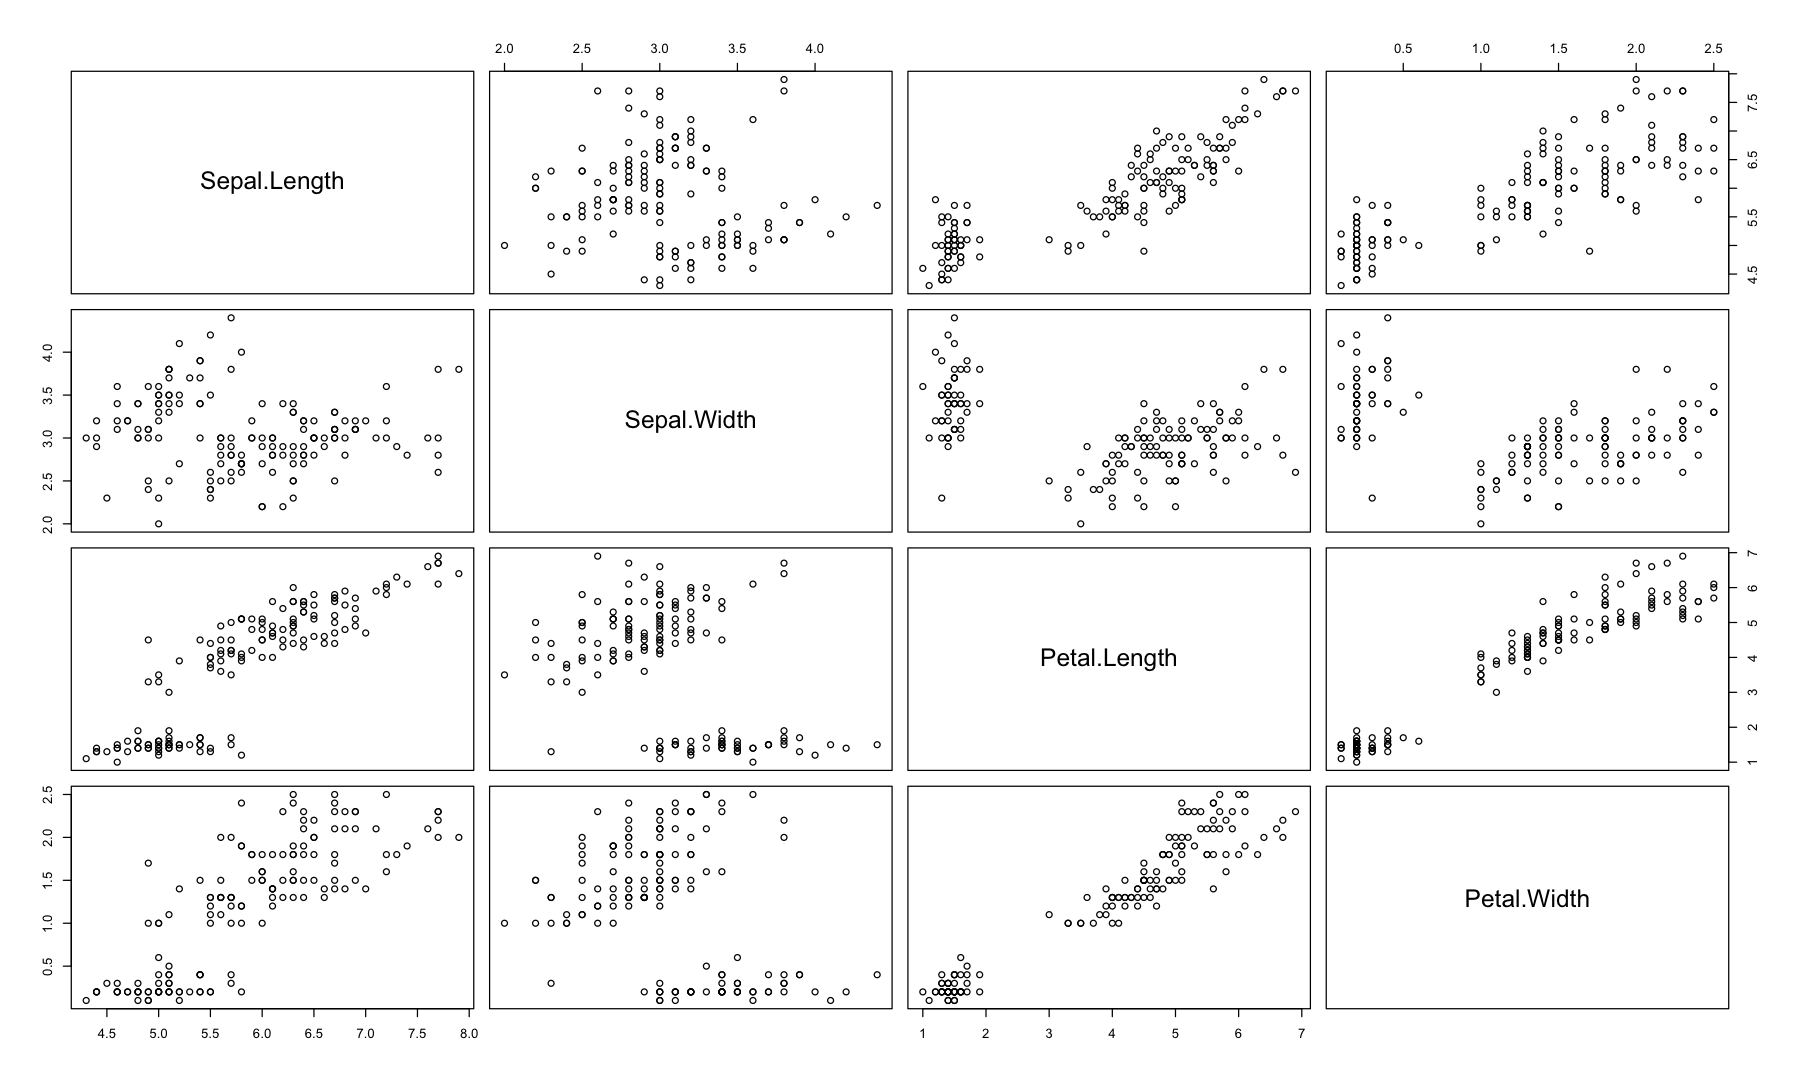

In [45]:
par(bg = 'white')
plot(iris[-5])

In [51]:
model <- lm(as.numeric(Species) ~ ., data=iris)
model


Call:
lm(formula = as.numeric(Species) ~ ., data = iris)

Coefficients:
 (Intercept)  Sepal.Length   Sepal.Width  Petal.Length   Petal.Width  
     1.18650      -0.11191      -0.04008       0.22865       0.60925  


In [52]:
summary((model))


Call:
lm(formula = as.numeric(Species) ~ ., data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.59215 -0.15368  0.01268  0.11089  0.55077 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.18650    0.20484   5.792 4.15e-08 ***
Sepal.Length -0.11191    0.05765  -1.941   0.0542 .  
Sepal.Width  -0.04008    0.05969  -0.671   0.5030    
Petal.Length  0.22865    0.05685   4.022 9.26e-05 ***
Petal.Width   0.60925    0.09446   6.450 1.56e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2191 on 145 degrees of freedom
Multiple R-squared:  0.9304,	Adjusted R-squared:  0.9285 
F-statistic: 484.5 on 4 and 145 DF,  p-value: < 2.2e-16


In [53]:
reduced <- step(model, direction = "backward")  # nolint

Start:  AIC=-450.56
as.numeric(Species) ~ Sepal.Length + Sepal.Width + Petal.Length + 
    Petal.Width

               Df Sum of Sq    RSS     AIC
- Sepal.Width   1   0.02164 6.9823 -452.09
<none>                      6.9606 -450.56
- Sepal.Length  1   0.18090 7.1415 -448.71
- Petal.Length  1   0.77649 7.7371 -436.69
- Petal.Width   1   1.99710 8.9577 -414.72

Step:  AIC=-452.09
as.numeric(Species) ~ Sepal.Length + Petal.Length + Petal.Width

               Df Sum of Sq    RSS     AIC
<none>                      6.9823 -452.09
- Sepal.Length  1   0.44324 7.4255 -444.86
- Petal.Length  1   1.51946 8.5017 -424.56
- Petal.Width   1   2.11632 9.0986 -414.38


In [54]:
summary((reduced))


Call:
lm(formula = as.numeric(Species) ~ Sepal.Length + Petal.Length + 
    Petal.Width, data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60753 -0.16188  0.01367  0.11217  0.54740 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.14469    0.19478   5.877 2.72e-08 ***
Sepal.Length -0.13624    0.04475  -3.044  0.00277 ** 
Petal.Length  0.25213    0.04473   5.637 8.67e-08 ***
Petal.Width   0.58689    0.08822   6.652 5.41e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2187 on 146 degrees of freedom
Multiple R-squared:  0.9302,	Adjusted R-squared:  0.9287 
F-statistic: 648.3 on 3 and 146 DF,  p-value: < 2.2e-16


In [ ]:
# 신뢰도의 차이가 별로 안나면 컬럼을 남기는게 좋다


---
# 교통사고 예측하기 (회귀식과 RandaomForest예측 비교)

In [56]:
# 교통사고 데이터 불러오기 
seoul <- read.csv("./Data/newSeoul2019.csv")
head(seoul)

,년도,월,자치구명,발생건수,사망자수,부상자수
,<int>,<int>,<chr>,<int>,<int>,<int>
1,2011,1,종로구,115,2,165
2,2011,2,종로구,99,0,134
3,2011,3,종로구,116,0,162
4,2011,4,종로구,110,1,153
5,2011,5,종로구,122,0,157
6,2011,6,종로구,116,3,163


In [58]:
# 종로구 데이터셋 만들기 
jongRo <- subset(seoul,자치구명 =='종로구')
nrow(jongRo)

[1] 108

In [61]:
head(jongRo,20)
tail(jongRo)

,년도,월,자치구명,발생건수,사망자수,부상자수
,<int>,<int>,<chr>,<int>,<int>,<int>
1,2011,1,종로구,115,2,165
2,2011,2,종로구,99,0,134
3,2011,3,종로구,116,0,162
4,2011,4,종로구,110,1,153
5,2011,5,종로구,122,0,157
6,2011,6,종로구,116,3,163
7,2011,7,종로구,103,1,154
8,2011,8,종로구,122,1,171
9,2011,9,종로구,121,2,166


,년도,월,자치구명,발생건수,사망자수,부상자수
,<int>,<int>,<chr>,<int>,<int>,<int>
2407,2019,7,종로구,83,0,109
2408,2019,8,종로구,115,0,164
2409,2019,9,종로구,99,0,143
2410,2019,10,종로구,104,0,139
2411,2019,11,종로구,100,0,126
2412,2019,12,종로구,100,0,142


In [66]:
# rownames 정리하기
rownames(jongRo) <- c()
tail(jongRo)

,년도,월,자치구명,발생건수,사망자수,부상자수
,<int>,<int>,<chr>,<int>,<int>,<int>
103,2019,7,종로구,83,0,109
104,2019,8,종로구,115,0,164
105,2019,9,종로구,99,0,143
106,2019,10,종로구,104,0,139
107,2019,11,종로구,100,0,126
108,2019,12,종로구,100,0,142


In [67]:
str(jongRo)

'data.frame':	108 obs. of  6 variables:
 $ 년도    : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ 월      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 자치구명: chr  "종로구" "종로구" "종로구" "종로구" ...
 $ 발생건수: int  115 99 116 110 122 116 103 122 121 135 ...
 $ 사망자수: int  2 0 0 1 0 3 1 1 2 2 ...
 $ 부상자수: int  165 134 162 153 157 163 154 171 166 193 ...


In [70]:
# 종로구의 발생건수와 부상자수의 상관계수
cor(jongRo$`부상자수` , jongRo$`발생건수`)

[1] 0.9208914

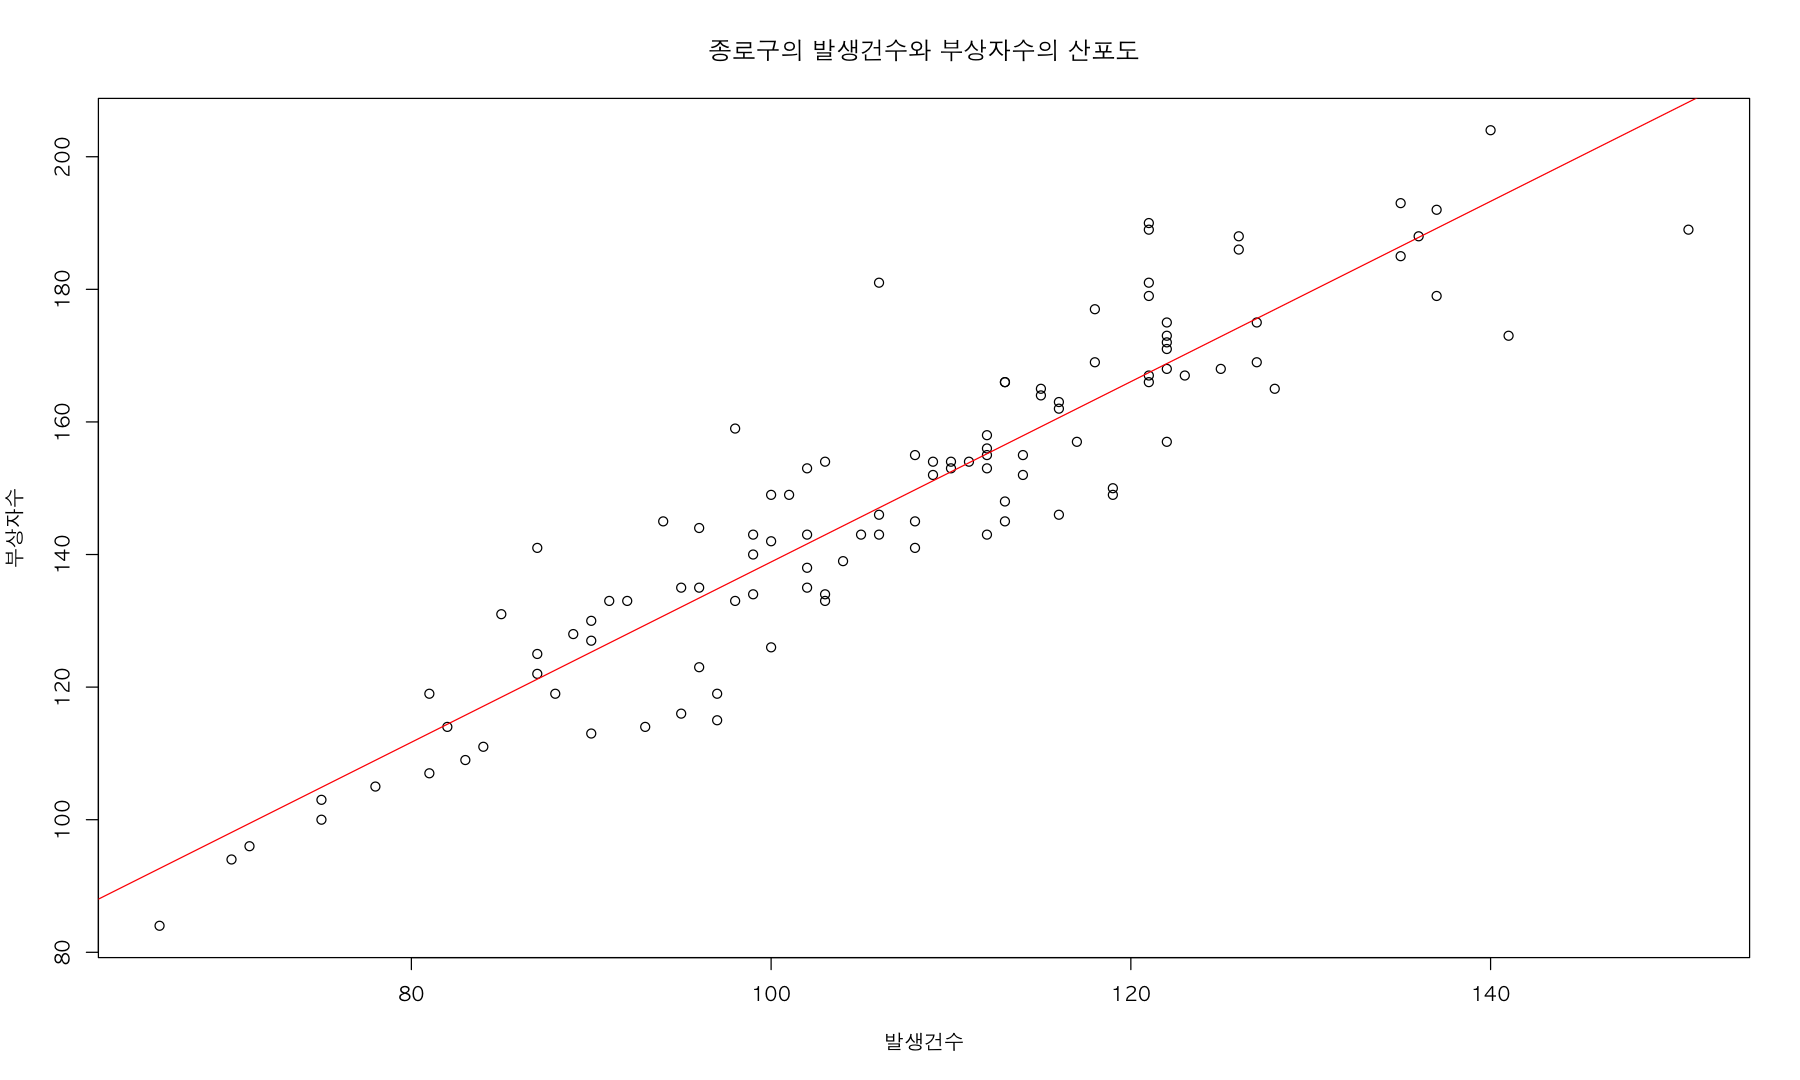

In [78]:
# 회귀선 그리기
par(family = "AppleGothic", bg = 'white') 
plot(jongRo$`부상자수` ~ jongRo$`발생건수`,
        main = "종로구의 발생건수와 부상자수의 산포도",
        xlab = "발생건수",
        ylab = "부상자수",
        )
        
D <- lm(jongRo$`부상자수` ~ jongRo$`발생건수`)
abline(D, col='red')

In [79]:
# 예측율
summary(D)


Call:
lm(formula = jongRo$부상자수 ~ jongRo$발생건수)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.637  -5.949  -0.019   5.301  33.961 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      2.88612    6.05535   0.477    0.635    
jongRo$발생건수  1.35993    0.05591  24.322   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.816 on 106 degrees of freedom
Multiple R-squared:  0.848,	Adjusted R-squared:  0.8466 
F-statistic: 591.6 on 1 and 106 DF,  p-value: < 2.2e-16


In [82]:
# 회귀식 
D


Call:
lm(formula = jongRo$부상자수 ~ jongRo$발생건수)

Coefficients:
    (Intercept)  jongRo$발생건수  
          2.886            1.360  


In [83]:
# 발생건수가 100건일 경우 예상 부상자수는?
 1.360 * 100 +2.886 

[1] 138.886

In [85]:
library(randomForest)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.



In [88]:
# 랜덤포레스트 예측 : 발생건수가 100일 경우의 부상자수?
rf <- randomForest(부상자수 ~ 발생건수, data=jongRo, ntree =100)
rf
# list 도 가능
predict(rf, data.frame(발생건수 = 100))


Call:
 randomForest(formula = 부상자수 ~ 발생건수, data = jongRo,      ntree = 100) 
               Type of random forest: regression
                     Number of trees: 100
No. of variables tried at each split: 1

          Mean of squared residuals: 119.2088
                    % Var explained: 80.85

1 
139.8343

---
### 발생건수가 145건일 경우 회귀식과 랜덤포래스트를 통한 부상자수를 예측하시오

In [94]:
# 회귀식
 1.360 * 145 + 2.886 

[1] 200.086

In [95]:
# 랜덤포래스트 
predict(rf, list(발생건수 = 145))

1 
186.896

In [97]:
# 150건 일때
predict(rf, list(발생건수 = 150))
 1.360 * 150 + 2.886 

1 
187.35

[1] 206.886

In [98]:
# 85건 일때 
predict(rf, list(발생건수 = 85))
 1.360 * 85 + 2.886 

1 
122.483

[1] 118.486

In [99]:
# 200건

# 데이터가 108개만 있어서 머신러닝은 데이터가 없으면 그 주변값으로 가져온다
# 모델은 데이터에 따라서 바꿔야한다

predict(rf, list(발생건수 = 200))
 1.360 * 200 + 2.886 


1 
187.35

[1] 274.886